## Model Training

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Load the dataset
data = pd.read_csv('bluetooth_data.csv')

# Split the data into features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')

from collections import Counter
print(Counter(y_train))


Accuracy: 0.90
Counter({0: 6316, 1: 684})


C:\Users\joe-orion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adjust class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Adjust threshold for predictions
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

# Evaluate predictions
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2711
           1       0.10      1.00      0.18       289

    accuracy                           0.10      3000
   macro avg       0.05      0.50      0.09      3000
weighted avg       0.01      0.10      0.02      3000



C:\Users\joe-orion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joe-orion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joe-orion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Verify and Balance Dataset
from collections import Counter
print(Counter(y_train))

# Use Class Weight
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#  Evaluate Predictions
y_pred = model.predict(X_test)
print(Counter(y_pred))

# y_prob = model.predict_proba(X_test)[:, 1]
y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Example threshold
y_pred = (y_prob >= threshold).astype(int)


Counter({0: 6316, 1: 684})
Counter({0: 1598, 1: 1402})


## Real-time Detection Script

In [8]:
import time
import numpy as np

def simulate_real_time_data(num_samples=10):
    for _ in range(num_samples):
        sample = {
            'connection_duration': np.random.exponential(scale=10),
            'signal_strength': np.random.normal(loc=-50, scale=10),
            'data_transfer_rate': np.random.exponential(scale=5),
            'time_of_day': np.random.uniform(low=0, high=24)
        }
        yield sample
        time.sleep(1.5)  # Simulate real-time data stream

def classify_connection(model, scaler, sample):
    sample_df = pd.DataFrame([sample])
    sample_scaled = scaler.transform(sample_df)
    prediction = model.predict(sample_scaled)[0]
    return prediction

# Simulate real-time data and classify
for sample in simulate_real_time_data():
    prediction = classify_connection(model, scaler, sample)
    status = "Intrusion Detected!\n" if prediction == 1 else "Normal Connection\n"
    print(f"Data: {sample} => Status: {status}")

Data: {'connection_duration': 10.941779517604495, 'signal_strength': -62.3161054088363, 'data_transfer_rate': 3.1180496424295905, 'time_of_day': 9.992982261331049} => Status: Normal Connection

Data: {'connection_duration': 0.4813844250273649, 'signal_strength': -54.62591901002234, 'data_transfer_rate': 1.275481959686636, 'time_of_day': 6.081798225487679} => Status: Normal Connection

Data: {'connection_duration': 2.277727459302551, 'signal_strength': -71.4149482075031, 'data_transfer_rate': 3.918298290546249, 'time_of_day': 4.897529498815572} => Status: Normal Connection

Data: {'connection_duration': 0.24425761955168118, 'signal_strength': -47.87264442060331, 'data_transfer_rate': 0.11044755091796714, 'time_of_day': 15.010641088676657} => Status: Intrusion Detected!

Data: {'connection_duration': 3.3409638130812436, 'signal_strength': -42.731778435242035, 'data_transfer_rate': 10.347634013410422, 'time_of_day': 0.02755985568532182} => Status: Normal Connection

Data: {'connection_dur

## Basic UI for Visualization
### Command-line Interface

1. Display Bluetooth Connections
2. Simulate Real-Time Detection
3. Exit

Enter your choice: 1


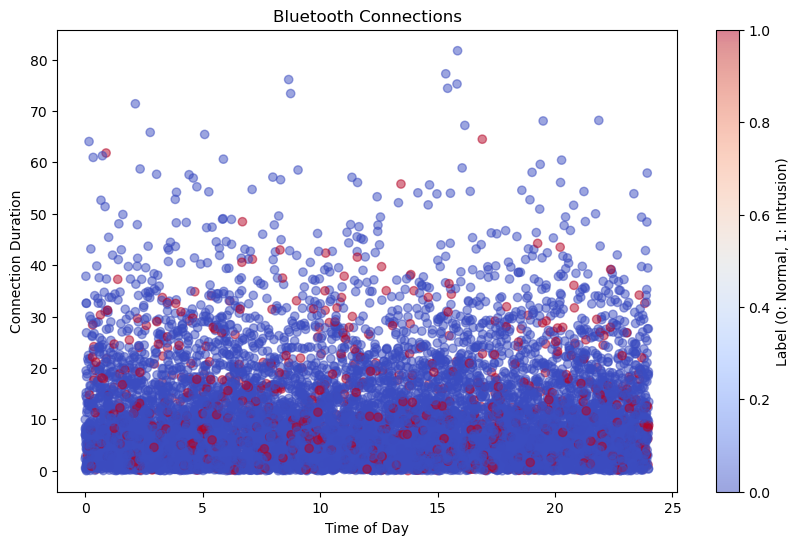

1. Display Bluetooth Connections
2. Simulate Real-Time Detection
3. Exit

Enter your choice: 2
Data: {'connection_duration': 0.7851209205302185, 'signal_strength': -51.270188377566626, 'data_transfer_rate': 1.2185024685824688, 'time_of_day': 23.123301253237987} => Status: Intrusion Detected!


Data: {'connection_duration': 26.30885190089996, 'signal_strength': -41.210677855586695, 'data_transfer_rate': 8.50083524481446, 'time_of_day': 20.099075909918533} => Status: Intrusion Detected!


Data: {'connection_duration': 5.5012495973887, 'signal_strength': -52.1321742632776, 'data_transfer_rate': 1.697049088368571, 'time_of_day': 12.771546308758806} => Status: Normal Connection


Data: {'connection_duration': 9.837203289842046, 'signal_strength': -64.57672266185448, 'data_transfer_rate': 19.650834171058033, 'time_of_day': 21.638980258722235} => Status: Normal Connection


Data: {'connection_duration': 11.388699117887365, 'signal_strength': -54.66823711843839, 'data_transfer_rate': 8.8459484

SystemExit: 

C:\Users\joe-orion\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
import sys
import matplotlib.pyplot as plt

# Block an intrusion (simulated)
def block_intrusion(sample):
    print(f"Blocking intrusion: {sample}")

def plot_data(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['time_of_day'], data['connection_duration'], c=data['label'], cmap='coolwarm', alpha=0.5)
    plt.title('Bluetooth Connections')
    plt.xlabel('Time of Day')
    plt.ylabel('Connection Duration')
    plt.colorbar(label='Label (0: Normal, 1: Intrusion)')
    plt.show()

def main():
    while True:
        print("1. Display Bluetooth Connections")
        print("2. Simulate Real-Time Detection")
        print("3. Exit\n")
        choice = input("Enter your choice: ")
        
        if choice == '1':
            data = pd.read_csv('bluetooth_data.csv')
            plot_data(data)
        elif choice == '2':
            for sample in simulate_real_time_data():
                prediction = classify_connection(model, scaler, sample)
                status = "Intrusion Detected!\n" if prediction == 1 else "Normal Connection\n"
                print(f"Data: {sample} => Status: {status}\n")
        elif choice == '3':
            print("Exiting...\n")
            sys.exit()
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


## Testing and Refinement

In [15]:
# Test scenarios
test_samples = [
    {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
    {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22},
    {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 0, 'time_of_day': 15},
    {'connection_duration': 30, 'signal_strength': 30, 'data_transfer_rate': 15, 'time_of_day': 3}
]


for sample in test_samples:
    prediction = classify_connection(model, scaler, sample)
    yield sample
    time.sleep(1.5)
    status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
    print(f"Data: {sample} => Status: {status}")
    if prediction == 1:
                    block_intrusion(sample)


SyntaxError: 'yield' outside function (2680191765.py, line 12)

In [45]:
data.head()

,connection_duration,signal_strength,data_transfer_rate,time_of_day,label
0,4.692681,-48.222990,17.794994,9.307826,0
1,30.101214,-63.353444,2.012450,19.284904,0
2,13.167457,-46.198021,3.289297,21.642577,0
3,9.129426,-43.894143,1.091388,4.883346,0
4,1.696249,-44.402096,4.718054,1.607367,0


In [46]:
data.tail()

,connection_duration,signal_strength,data_transfer_rate,time_of_day,label
995,0.960507,-63.200225,1.013288,17.624776,0
996,24.926998,-56.117691,9.654212,5.011942,0
997,1.471304,-50.370368,10.709133,1.405567,0
998,30.004907,-54.293022,3.139698,13.256787,0
999,5.906010,-56.924210,0.393591,14.285514,0


## More test samples

In [57]:
# Define a potentially suspicious test sample
intrusion_test_sample = {'connection_duration': 16, 'signal_strength': -25, 'data_transfer_rate':10.345420566187718 , 'time_of_day': 12}

# Block an intrusion (simulated)
def block_intrusion(sample):
    print(f"Blocking intrusion: {sample}")
    
# Test samples including the suspicious one
test_samples = [
    {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
    {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22},
    {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15},
    {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 10},
    intrusion_test_sample  # Adding the suspicious sample to the test list
]

for sample in test_samples:
                prediction = classify_connection(model, scaler, sample)
                status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
                print(f"Data: {sample} => Status: {status}")
                if prediction == 1:
                    block_intrusion(sample)


Data: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10} => Status: Intrusion Detected!
Blocking intrusion: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10}
Data: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22} => Status: Normal Connection
Data: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15} => Status: Intrusion Detected!
Blocking intrusion: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15}
Data: {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 10} => Status: Normal Connection
Data: {'connection_duration': 16, 'signal_strength': -25, 'data_transfer_rate': 10.345420566187718, 'time_of_day': 12} => Status: Normal Connection
